In [1]:
import random
random.seed(a=613)
import numpy as np
import scProject
import scanpy as sc
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('/Users/asherbaraban/PycharmProjects/scProject/scProject/test/targetALS_elim_annotated_20200510/p6counts.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'id')


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(50127, 2996) dataset filter shape
(80, 2996) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(415, 2996) (49712, 2996) (50127, 2996)
C1 is dense
C2 is dense


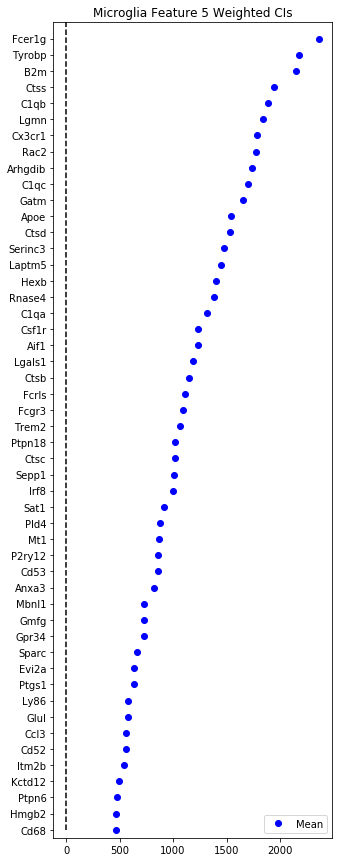

In [4]:
import matplotlib.pyplot as plt
import numpy as np
microglia= dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(['Microglia'])].copy()
others= dataset_filtered.obs['assigned_cell_type'].unique().remove_categories('Microglia')
rest = dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(list(others))].copy()
print(microglia.shape, rest.shape, dataset_filtered.shape)

microglia.X = np.log2(microglia.X + 1e-30) #log transform for statistical tests
rest.X = np.log2(rest.X + 1e-30) #log transform for statistcal tests

plt.rcParams['figure.figsize']= [5,50]
df5 = scProject.stats.projectionDriver(patterns_filtered, microglia, rest,.999999999999,'gene_short_name', 5, display=False)

sigs5 = df5[0].index
fiveWCIS = df5[1].loc[sigs5]
fiveWCIS['rank'] = abs(fiveWCIS['Low']+fiveWCIS['High'])
fiveWCIS = fiveWCIS.sort_values(by='rank', ascending=False).head(50)

counter = len(fiveWCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(fiveWCIS.index) ,fiveWCIS['Low'], fiveWCIS['High'], range(len(fiveWCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 5 Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/MicrogliaF5Weighted.pdf", bbox_inches='tight')
plt.show()

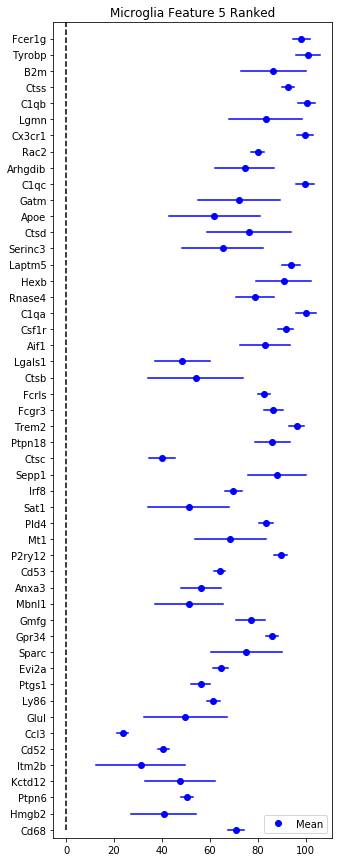

In [5]:
# Bon CIs
fiveWCIS = df5[0].loc[fiveWCIS.index]

counter = len(fiveWCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(fiveWCIS.index) ,fiveWCIS['Low'], fiveWCIS['High'], range(len(fiveWCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 5 Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/MicrogliaF5Bon.pdf", bbox_inches='tight')
plt.show()

C1 is dense
C2 is dense


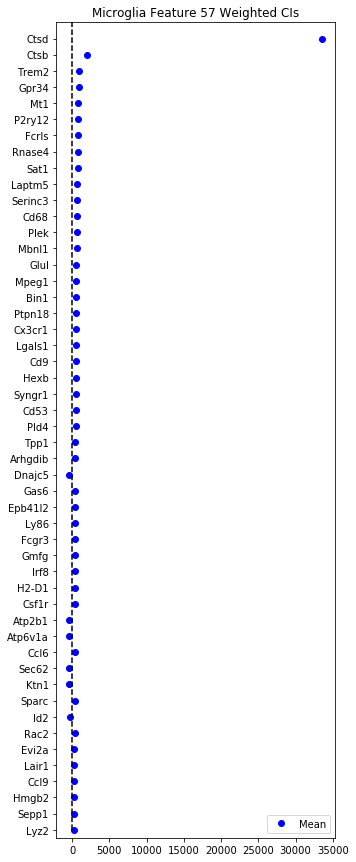

In [34]:
df57 = scProject.stats.projectionDriver(patterns_filtered, microglia, rest,.999999999999,'gene_short_name', 57, display=False)

sigs57 = df57[0].index
five7WCIS = df57[1].loc[sigs57]
five7WCIS['rank'] = abs(five7WCIS['Low']+five7WCIS['High'])
five7WCIS = five7WCIS.sort_values(by='rank', ascending=False).head(50)

counter = len(five7WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(five7WCIS.index) ,five7WCIS['Low'], five7WCIS['High'], range(len(five7WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/MicrogliaF57Weighted.pdf", bbox_inches='tight')
plt.show()

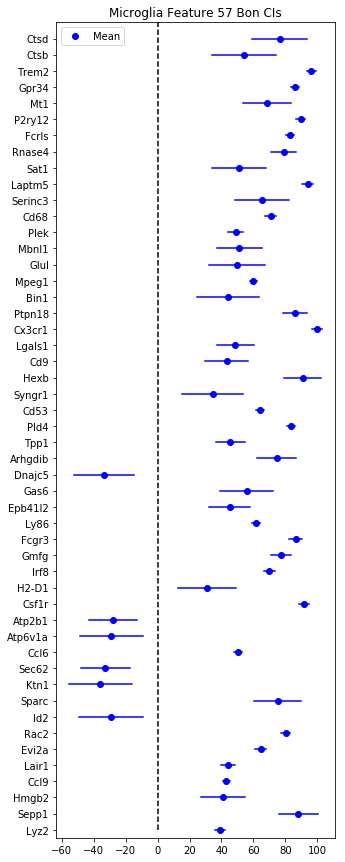

In [35]:
# Bon CIs
five7WCIS = df57[0].loc[five7WCIS.index]

counter = len(five7WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(five7WCIS.index) ,five7WCIS['Low'], five7WCIS['High'], range(len(five7WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Bon CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/MicrogliaF57Bon.pdf", bbox_inches='tight')
plt.show()

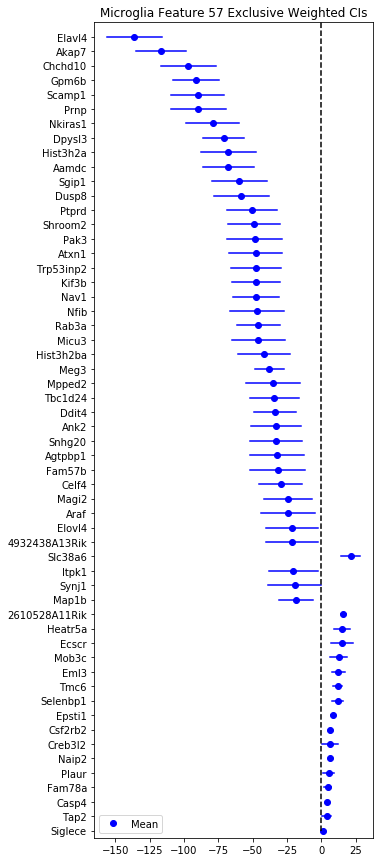

In [38]:
# 57 exclusive
e57 = df57[0].index.difference(df5[0].index)
exclusive57WCIS = df57[1].loc[e57]
exclusive57WCIS['rank'] = abs(exclusive57WCIS['Low']+exclusive57WCIS['High'])
exclusive57WCIS = exclusive57WCIS.sort_values(by='rank', ascending=False)

counter = len(exclusive57WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(exclusive57WCIS.index) ,exclusive57WCIS['Low'], exclusive57WCIS['High'], range(len(exclusive57WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Exclusive Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/MicrogliaF57ExclusiveWeighted.pdf", bbox_inches='tight')
plt.show()

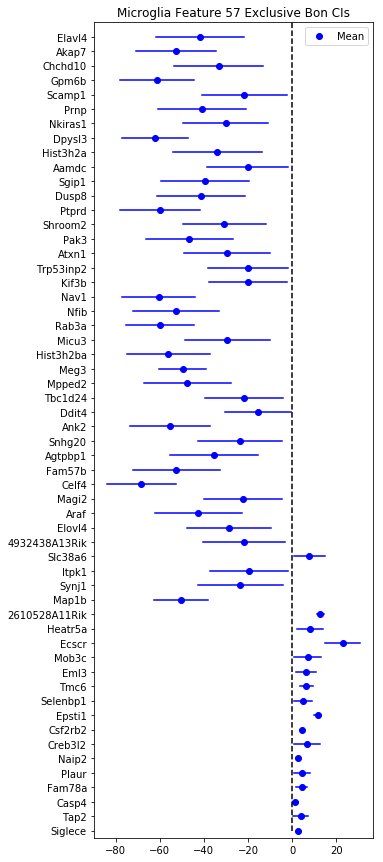

In [40]:
# Bon CIs
exclusive57CIS = df57[0].loc[exclusive57WCIS.index]

counter = len(exclusive57CIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(exclusive57CIS.index) ,exclusive57CIS['Low'], exclusive57CIS['High'], range(len(exclusive57CIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 57 Exclusive Bon CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/MicrogliaF57ExclusiveBon.pdf", bbox_inches='tight')
plt.show()

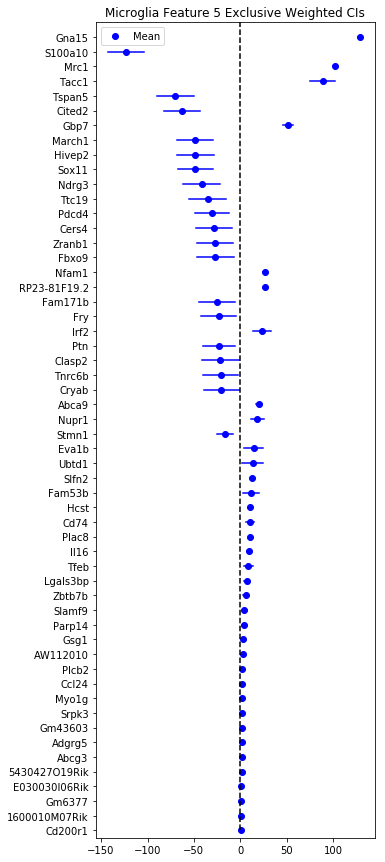

In [42]:
# 5 exclusive
e5 = df5[0].index.difference(df57[0].index)
exclusive5WCIS = df5[1].loc[e5]
exclusive5WCIS['rank'] = abs(exclusive5WCIS['Low']+exclusive5WCIS['High'])
exclusive5WCIS = exclusive5WCIS.sort_values(by='rank', ascending=False)

counter = len(exclusive5WCIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(exclusive5WCIS.index) ,exclusive5WCIS['Low'], exclusive5WCIS['High'], range(len(exclusive5WCIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 5 Exclusive Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/MicrogliaF5ExclusiveWeighted.pdf", bbox_inches='tight')
plt.show()

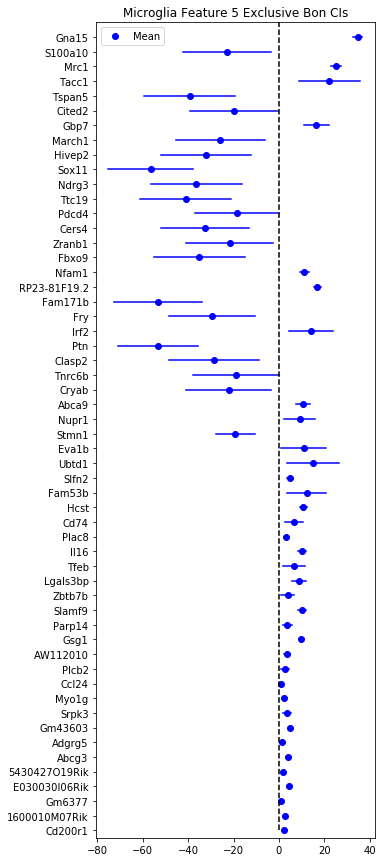

In [43]:
# 5 Exclusive Bon CIs
exclusive5CIS = df5[0].loc[exclusive5WCIS.index]

counter = len(exclusive5CIS)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(exclusive5CIS.index) ,exclusive5CIS['Low'], exclusive5CIS['High'], range(len(exclusive5CIS))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 5 Exclusive Bon CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
# plt.savefig("557MG/MicrogliaF57ExclusiveBon.pdf", bbox_inches='tight')
plt.show()

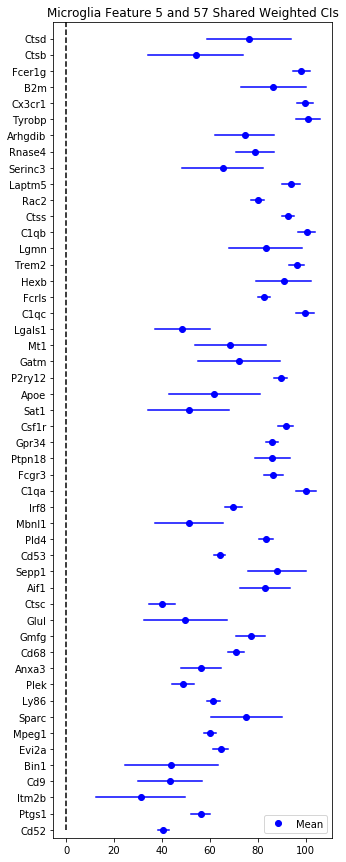

In [63]:
# shared genes
import pandas as pd
shared = df5[0].index.intersection(df57[0].index)
shared5WCI = df5[1].loc[shared]
shared57WCI = df57[1].loc[shared]
shared5WCI.columns = ['5Low', '5High']
shared57WCI.columns = ['57Low', '57High']
shared5WCI['rank5'] = abs(shared5WCI['5Low']+shared5WCI['5High'])
shared57WCI['rank57'] = abs(shared57WCI['57Low']+shared57WCI['57High'])

tog = pd.concat([shared57WCI, shared5WCI], axis=1)
tog['rank'] = tog['rank5'] + tog['rank57']
tog = tog.sort_values(by='rank', ascending=False).head(50)

# Bon CIs
sharedCIs = df5[0].loc[tog.index]

counter = len(sharedCIs)-1
yAxis = []
plt.rcParams['figure.figsize']= [5, 15]
for idx,low, high,y in zip(list(tog.index) ,sharedCIs['Low'], sharedCIs['High'], range(len(sharedCIs))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.insert(0,idx)
    counter-=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Microglia Feature 5 and 57 Shared Weighted CIs")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis))
plt.ylim(bottom=-.5)
plt.legend()
plt.savefig("557MG/F5andF57shared.pdf", bbox_inches='tight')
plt.show()